In [1]:
import os
import numpy as np
import pickle
import uproot
import glob
import pandas as pd
from tqdm import tqdm
import json
import sys
## user define
sys.path.append(".")
# from utils import HistStack

import ROOT as rt

Welcome to JupyROOT 6.26/08


# Draw Z' production cross section

In [2]:
import requests

# 1st: sigma*BR(Z'), 2nd: BR(ee), 3rd: gamma/MZ'
model="Psi"
URL={
    # "SSM": ["https://gitlab.cern.ch/cms-zprime-dileptons/ZPrimeCombine/-/raw/master/tools/xsec_ssm.txt", 0.031, 0.0297], # need to bypass cern SSO, use copied data 
    # "Psi": ["https://gitlab.cern.ch/cms-zprime-dileptons/ZPrimeCombine/-/raw/master/tools/xsec_psi.txt", 0.044, 0.0053]
    "SSM": ["https://hkwon.web.cern.ch/hkwon/AnalysisPlots/EXO19019/xsec_ssm.txt", 0.031, 0.0297],
    "Psi": ["https://hkwon.web.cern.ch/hkwon/AnalysisPlots/EXO19019/xsec_psi.txt", 0.044, 0.0053],
    "Kai": ["https://hkwon.web.cern.ch/hkwon/AnalysisPlots/EXO19019/xsec_kai.txt", 0.061, 0.0117],
    "Eta": ["https://hkwon.web.cern.ch/hkwon/AnalysisPlots/EXO19019/xsec_eta.txt", 0.037, 0.0064]
}

In [3]:
def get_xsec(model, prod=True):
    X=[]
    Y=[]
    r = requests.get(URL[model][0])
    a = str(r.content.decode("utf-8"))
    b = a.split('\n')
    BRtoee=float(URL[model][1]) #https://arxiv.org/pdf/1010.6058.pdf
    print(BRtoee)
    for c in b:
        d = c.split(' ')
        if len(d)==3:
            mass = float(d[0])
            xbr = float(d[1])
            if prod:
                xsec=xbr/BRtoee
            else:
                xsec=xbr
        X.append(mass)
        Y.append(xsec)
    aX=np.array(X)
    aY=np.array(Y)
    Graph=rt.TGraph(len(X),aX,aY)
    return Graph


0.031
0.044
0.037
0.061


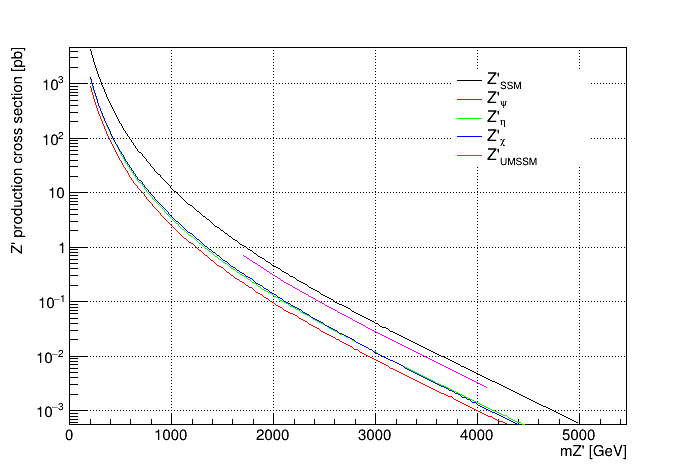

In [4]:
c1 = rt.TCanvas()
c1.SetLogy()
c1.SetGrid()

g1 = get_xsec("SSM")
g2 = get_xsec("Psi")
g3 = get_xsec("Eta")
g4 = get_xsec("Kai")
g1.Draw()
g1.SetTitle("")
g1.GetYaxis().SetTitle("Z' production cross section [pb]")
g1.GetXaxis().SetTitle("mZ' [GeV]")
g1.SetLineColor(1)
g2.Draw("same")
g2.SetLineColor(2)
g3.Draw("same")
g3.SetLineColor(3)
g4.Draw("same")
g4.SetLineColor(4)

# UMSSM
X1=[1700.0, 2100.0, 2500.0, 2900.0, 3300.0, 3700.0, 4100.0]
Y1=[0.7046, 0.2395, 0.0879, 0.03535, 0.01459, 0.0062, 0.0027]
aX1=np.array(X1)
aY1=np.array(Y1)
g=rt.TGraph(len(X1),aX1,aY1)
g.Draw("same")
g.SetLineColor(6)

l = rt.TLegend(0.65,0.65,0.85,0.85)
l.SetBorderSize(0)
l.AddEntry(g1, "Z'_{SSM}", "l")
l.AddEntry(g2, "Z'_{#psi}", "l")
l.AddEntry(g3, "Z'_{#eta}", "l")
l.AddEntry(g4, "Z'_{#chi}", "l")
l.AddEntry(g, "Z'_{UMSSM}", "l")
l.Draw()
c1.Draw()
# c1.SaveAs("ProdXsecs.pdf")

# Draw MCHCH

In [5]:
input_dir="/eos/user/h/hkwon/Run2/sample_signal/Validation_v1/"

f = []
for (dirpath, dirnames, filenames) in os.walk(input_dir):
    f.extend(filenames)
    break

list=[]   
list_hist=[]
list_hist_l1=[]
list_hist_l2=[]
sample=[]
for file in tqdm(f):
    if "Zp-3700_CH-1845" in file or "Zp-1700_CH-845" in file:
        continue
    fin=rt.TFile(input_dir+file)
    list.append(fin)
    sample.append(file.replace(".root", ""))
    h=fin.Get("h_mchch")
    h1=fin.Get("h_l1")
    h2=fin.Get("h_l2")
    list_hist.append(h)    
    list_hist_l1.append(h1)    
    list_hist_l2.append(h2)    
print(list_hist)
print(list_hist_l1)
print(list_hist_l2)
print(sample)

100%|██████████| 33/33 [00:00<00:00, 82.79it/s]


[<cppyy.gbl.TH1D object at 0xa20e350>, <cppyy.gbl.TH1D object at 0xa362490>, <cppyy.gbl.TH1D object at 0xa35b320>, <cppyy.gbl.TH1D object at 0xa3668f0>, <cppyy.gbl.TH1D object at 0xa356a70>, <cppyy.gbl.TH1D object at 0xa3587b0>, <cppyy.gbl.TH1D object at 0xa3c6490>, <cppyy.gbl.TH1D object at 0xa3d9780>, <cppyy.gbl.TH1D object at 0xa3f2050>, <cppyy.gbl.TH1D object at 0xa4055f0>, <cppyy.gbl.TH1D object at 0xa41ccc0>, <cppyy.gbl.TH1D object at 0xa399900>, <cppyy.gbl.TH1D object at 0xa39b2a0>, <cppyy.gbl.TH1D object at 0xa429f70>, <cppyy.gbl.TH1D object at 0xa430300>, <cppyy.gbl.TH1D object at 0xa45a240>, <cppyy.gbl.TH1D object at 0xa45bf10>, <cppyy.gbl.TH1D object at 0xa4b27a0>, <cppyy.gbl.TH1D object at 0xa492f20>, <cppyy.gbl.TH1D object at 0xa4943e0>, <cppyy.gbl.TH1D object at 0xa4c65a0>, <cppyy.gbl.TH1D object at 0xa508f90>, <cppyy.gbl.TH1D object at 0xa3fd360>, <cppyy.gbl.TH1D object at 0xa3feb70>, <cppyy.gbl.TH1D object at 0xa529870>, <cppyy.gbl.TH1D object at 0xa529d30>, <cppyy.gbl.

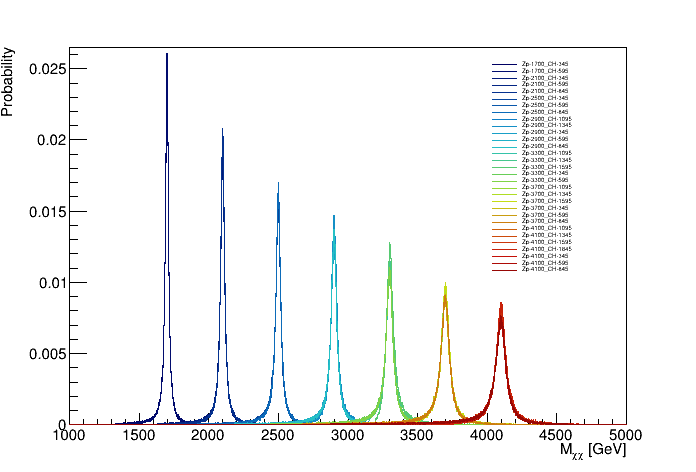

In [6]:
c=rt.TCanvas()
rt.gStyle.SetPalette(rt.kRainBow)
rt.gStyle.SetOptStat(0)
l = rt.TLegend(0.7,0.42,0.9,0.87)
l.SetBorderSize(0)

for i, h in enumerate(list_hist):
    h.Scale(1/h.Integral()) # normalize to 1
    h.SetTitle("")
    h.GetYaxis().SetTitle("Probability")
    h.GetXaxis().SetTitle("M_{#chi#chi} [GeV]")
    h.GetXaxis().SetRangeUser(1000, 5000)
    l.AddEntry(h, sample[i], "l")
    if i==0:
        h.Draw("plc hist")
    else:
        h.Draw("plc same hist")

l.Draw()        
c.Draw()
# c.SaveAs("MCHCH.pdf")
    

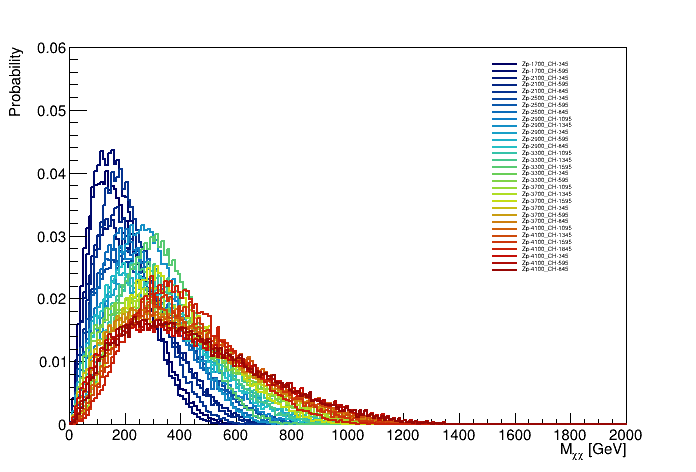

In [7]:
c=rt.TCanvas()
rt.gStyle.SetPalette(rt.kRainBow)
rt.gStyle.SetOptStat(0)
l = rt.TLegend(0.7,0.42,0.9,0.87)
l.SetBorderSize(0)

for i, h in enumerate(list_hist_l1):
    h1 = h.Clone("")
    h1.Rebin(10)
    h1.Scale(1/h1.Integral()) # normalize to 1
    h1.SetTitle("")
    h1.GetYaxis().SetTitle("Probability")
    h1.GetYaxis().SetRangeUser(0, 0.06)
    h1.GetXaxis().SetTitle("M_{#chi#chi} [GeV]")
    h1.GetXaxis().SetRangeUser(0, 2000)
    h1.SetLineWidth(2)
    l.AddEntry(h1, sample[i], "l")
    if i==0:
        h1.Draw("plc hist")
    else:
        h1.Draw("plc same hist")

l.Draw()        
c.Draw()

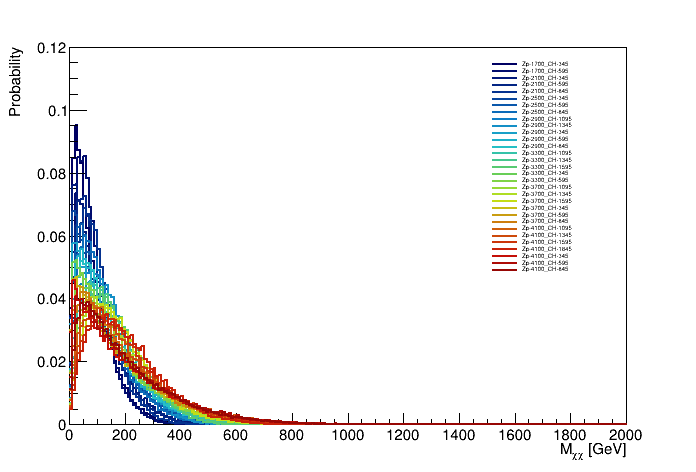

In [10]:
c=rt.TCanvas()
rt.gStyle.SetPalette(rt.kRainBow)
rt.gStyle.SetOptStat(0)
l = rt.TLegend(0.7,0.42,0.9,0.87)
l.SetBorderSize(0)

for i, h in enumerate(list_hist_l2):
    h1 = h.Clone("")
    h1.Rebin(10)
    h1.Scale(1/h1.Integral()) # normalize to 1
    h1.SetTitle("")
    h1.GetYaxis().SetTitle("Probability")
    h1.GetYaxis().SetRangeUser(0, 0.12)
    h1.GetXaxis().SetTitle("M_{#chi#chi} [GeV]")
    h1.GetXaxis().SetRangeUser(0, 2000)
    h1.SetLineWidth(2)
    l.AddEntry(h1, sample[i], "l")
    if i==0:
        h1.Draw("plc hist")
    else:
        h1.Draw("plc same hist")

l.Draw()        
c.Draw()